In [1]:
#@title Setup (may take a few minutes)
import os
from argparse import Namespace
import time
import os
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

sys.path.append(".")
sys.path.append("..")

In [3]:
%cd encoder4editing/

/home/jykim/JY_project/Project/Style/encoder4editing


In [4]:
from utils.common import tensor2im
from models.psp import pSp

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
%cd ..

/home/jykim/JY_project/Project/Style


## Select dataset

In [7]:
dataset_name='ffhq' #@param ['ffhq'] {allow-input: true}
# input dataset name

%cd StyleCLIP/global_torch/

if not os.path.isfile('./model/'+dataset_name+'.pkl'):
        url='https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/'
        name='stylegan2-'+dataset_name+'-config-f.pkl'
        os.system('wget ' +url+name + '  -P  ./model/')
        os.system('mv ./model/'+name+' ./model/'+dataset_name+'.pkl')

/home/jykim/JY_project/Project/Style/StyleCLIP/global_torch


--2023-08-17 12:55:49--  https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.225.114.64, 13.225.114.57, 13.225.114.22, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.225.114.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘./model/stylegan2-ffhq-config-f.pkl’

     0K .......... .......... .......... .......... ..........  0% 16.9M 22s
    50K .......... .......... .......... .......... ..........  0% 23.2M 19s
   100K .......... .......... .......... .......... ..........  0% 69.9M 14s
   150K .......... .......... .......... .......... ..........  0% 68.6M 12s
   200K .......... .......... .......... .......... ..........  0% 38.0M 11s
   250K .......... .......... .......... .......... ..........  0%  118M 10s
   300K .......... .......... .......... .......... ..........

  5100K .......... .......... .......... .......... ..........  1% 3.64M 47s
  5150K .......... .......... .......... .......... ..........  1% 3.46M 48s
  5200K .......... .......... .......... .......... ..........  1% 3.58M 48s
  5250K .......... .......... .......... .......... ..........  1% 3.34M 49s
  5300K .......... .......... .......... .......... ..........  1% 3.37M 49s
  5350K .......... .......... .......... .......... ..........  1% 3.69M 50s
  5400K .......... .......... .......... .......... ..........  1% 3.08M 50s
  5450K .......... .......... .......... .......... ..........  1% 3.34M 51s
  5500K .......... .......... .......... .......... ..........  1% 3.40M 51s
  5550K .......... .......... .......... .......... ..........  1% 3.12M 52s
  5600K .......... .......... .......... .......... ..........  1% 3.66M 52s
  5650K .......... .......... .......... .......... ..........  1% 3.34M 53s
  5700K .......... .......... .......... .......... ..........  1% 3.37M 53s

 10700K .......... .......... .......... .......... ..........  2% 5.01M 77s
 10750K .......... .......... .......... .......... ..........  2% 3.18M 77s
 10800K .......... .......... .......... .......... ..........  2% 3.36M 77s
 10850K .......... .......... .......... .......... ..........  2% 3.57M 77s
 10900K .......... .......... .......... .......... ..........  2% 3.37M 77s
 10950K .......... .......... .......... .......... ..........  2% 3.37M 77s
 11000K .......... .......... .......... .......... ..........  2% 2.53M 78s
 11050K .......... .......... .......... .......... ..........  2% 5.02M 78s
 11100K .......... .......... .......... .......... ..........  2% 3.04M 78s
 11150K .......... .......... .......... .......... ..........  3% 3.75M 78s
 11200K .......... .......... .......... .......... ..........  3% 3.37M 78s
 11250K .......... .......... .......... .......... ..........  3% 3.37M 78s
 11300K .......... .......... .......... .......... ..........  3% 3.37M 78s

 16300K .......... .......... .......... .......... ..........  4% 3.39M 85s
 16350K .......... .......... .......... .......... ..........  4% 4.59M 85s
 16400K .......... .......... .......... .......... ..........  4% 3.55M 85s
 16450K .......... .......... .......... .......... ..........  4% 3.41M 85s
 16500K .......... .......... .......... .......... ..........  4% 2.94M 85s
 16550K .......... .......... .......... .......... ..........  4% 2.77M 85s
 16600K .......... .......... .......... .......... ..........  4% 2.59M 86s
 16650K .......... .......... .......... .......... ..........  4% 5.03M 85s
 16700K .......... .......... .......... .......... ..........  4% 3.33M 85s
 16750K .......... .......... .......... .......... ..........  4% 3.38M 86s
 16800K .......... .......... .......... .......... ..........  4% 3.12M 86s
 16850K .......... .......... .......... .......... ..........  4% 3.37M 86s
 16900K .......... .......... .......... .......... ..........  4% 3.66M 86s

 21950K .......... .......... .......... .......... ..........  5% 3.39M 88s
 22000K .......... .......... .......... .......... ..........  5% 3.03M 88s
 22050K .......... .......... .......... .......... ..........  5% 3.79M 88s
 22100K .......... .......... .......... .......... ..........  5% 3.18M 88s
 22150K .......... .......... .......... .......... ..........  5% 3.59M 88s
 22200K .......... .......... .......... .......... ..........  5% 2.52M 89s
 22250K .......... .......... .......... .......... ..........  5% 3.38M 89s
 22300K .......... .......... .......... .......... ..........  5% 4.95M 88s
 22350K .......... .......... .......... .......... ..........  6% 3.37M 88s
 22400K .......... .......... .......... .......... ..........  6% 3.37M 89s
 22450K .......... .......... .......... .......... ..........  6% 3.37M 89s
 22500K .......... .......... .......... .......... ..........  6% 3.37M 89s
 22550K .......... .......... .......... .......... ..........  6% 3.36M 89s

 27550K .......... .......... .......... .......... ..........  7% 4.11M 90s
 27600K .......... .......... .......... .......... ..........  7% 3.39M 90s
 27650K .......... .......... .......... .......... ..........  7% 3.37M 90s
 27700K .......... .......... .......... .......... ..........  7% 3.37M 90s
 27750K .......... .......... .......... .......... ..........  7% 3.18M 90s
 27800K .......... .......... .......... .......... ..........  7% 2.65M 90s
 27850K .......... .......... .......... .......... ..........  7% 3.37M 90s
 27900K .......... .......... .......... .......... ..........  7% 3.17M 90s
 27950K .......... .......... .......... .......... ..........  7% 4.27M 90s
 28000K .......... .......... .......... .......... ..........  7% 2.24M 90s
 28050K .......... .......... .......... .......... ..........  7% 4.74M 90s
 28100K .......... .......... .......... .......... ..........  7% 3.55M 90s
 28150K .......... .......... .......... .......... ..........  7% 3.37M 90s

 33150K .......... .......... .......... .......... ..........  8% 3.47M 90s
 33200K .......... .......... .......... .......... ..........  8% 3.37M 90s
 33250K .......... .......... .......... .......... ..........  8% 3.37M 90s
 33300K .......... .......... .......... .......... ..........  8% 3.36M 90s
 33350K .......... .......... .......... .......... ..........  8% 5.01M 90s
 33400K .......... .......... .......... .......... ..........  8% 2.14M 90s
 33450K .......... .......... .......... .......... ..........  8% 4.44M 90s
 33500K .......... .......... .......... .......... ..........  9% 3.37M 90s
 33550K .......... .......... .......... .......... ..........  9% 3.34M 90s
 33600K .......... .......... .......... .......... ..........  9% 3.37M 90s
 33650K .......... .......... .......... .......... ..........  9% 3.37M 90s
 33700K .......... .......... .......... .......... ..........  9% 3.37M 90s
 33750K .......... .......... .......... .......... ..........  9% 5.04M 90s

 38550K .......... .......... .......... .......... .......... 10% 4.76M 90s
 38600K .......... .......... .......... .......... .......... 10% 2.48M 90s
 38650K .......... .......... .......... .......... .......... 10% 2.97M 90s
 38700K .......... .......... .......... .......... .......... 10% 4.19M 90s
 38750K .......... .......... .......... .......... .......... 10% 3.35M 90s
 38800K .......... .......... .......... .......... .......... 10% 3.36M 90s
 38850K .......... .......... .......... .......... .......... 10% 3.38M 90s
 38900K .......... .......... .......... .......... .......... 10% 3.45M 90s
 38950K .......... .......... .......... .......... .......... 10% 4.83M 90s
 39000K .......... .......... .......... .......... .......... 10% 2.53M 90s
 39050K .......... .......... .......... .......... .......... 10% 3.37M 90s
 39100K .......... .......... .......... .......... .......... 10% 3.38M 90s
 39150K .......... .......... .......... .......... .......... 10% 3.10M 90s

 44150K .......... .......... .......... .......... .......... 11% 4.60M 90s
 44200K .......... .......... .......... .......... .......... 11% 2.36M 90s
 44250K .......... .......... .......... .......... .......... 11% 3.99M 90s
 44300K .......... .......... .......... .......... .......... 11% 2.90M 90s
 44350K .......... .......... .......... .......... .......... 11% 3.77M 90s
 44400K .......... .......... .......... .......... .......... 11% 3.56M 90s
 44450K .......... .......... .......... .......... .......... 11% 3.36M 90s
 44500K .......... .......... .......... .......... .......... 11% 3.37M 90s
 44550K .......... .......... .......... .......... .......... 11% 3.78M 90s
 44600K .......... .......... .......... .......... .......... 11% 3.01M 90s
 44650K .......... .......... .......... .......... .......... 11% 3.38M 90s
 44700K .......... .......... .......... .......... .......... 12% 3.38M 90s
 44750K .......... .......... .......... .......... .......... 12% 3.37M 90s

 49750K .......... .......... .......... .......... .......... 13% 3.54M 89s
 49800K .......... .......... .......... .......... .......... 13% 2.55M 89s
 49850K .......... .......... .......... .......... .......... 13% 4.90M 89s
 49900K .......... .......... .......... .......... .......... 13% 2.98M 89s
 49950K .......... .......... .......... .......... .......... 13% 3.90M 89s
 50000K .......... .......... .......... .......... .......... 13% 3.37M 89s
 50050K .......... .......... .......... .......... .......... 13% 3.37M 89s
 50100K .......... .......... .......... .......... .......... 13% 3.37M 89s
 50150K .......... .......... .......... .......... .......... 13% 3.35M 89s
 50200K .......... .......... .......... .......... .......... 13% 3.01M 89s
 50250K .......... .......... .......... .......... .......... 13% 3.78M 89s
 50300K .......... .......... .......... .......... .......... 13% 3.36M 89s
 50350K .......... .......... .......... .......... .......... 13% 3.05M 89s

 55350K .......... .......... .......... .......... .......... 14% 3.45M 88s
 55400K .......... .......... .......... .......... .......... 14% 2.55M 88s
 55450K .......... .......... .......... .......... .......... 14% 3.33M 88s
 55500K .......... .......... .......... .......... .......... 14% 3.59M 88s
 55550K .......... .......... .......... .......... .......... 14% 3.55M 88s
 55600K .......... .......... .......... .......... .......... 14% 4.26M 88s
 55650K .......... .......... .......... .......... .......... 14% 3.39M 88s
 55700K .......... .......... .......... .......... .......... 14% 3.37M 88s
 55750K .......... .......... .......... .......... .......... 14% 3.34M 88s
 55800K .......... .......... .......... .......... .......... 14% 2.54M 88s
 55850K .......... .......... .......... .......... .......... 14% 4.61M 88s
 55900K .......... .......... .......... .......... .......... 15% 3.37M 88s
 55950K .......... .......... .......... .......... .......... 15% 3.55M 87s

 60950K .......... .......... .......... .......... .......... 16% 3.79M 86s
 61000K .......... .......... .......... .......... .......... 16% 2.53M 86s
 61050K .......... .......... .......... .......... .......... 16% 3.36M 86s
 61100K .......... .......... .......... .......... .......... 16% 3.38M 86s
 61150K .......... .......... .......... .......... .......... 16% 3.47M 86s
 61200K .......... .......... .......... .......... .......... 16% 4.75M 86s
 61250K .......... .......... .......... .......... .......... 16% 3.37M 86s
 61300K .......... .......... .......... .......... .......... 16% 3.37M 86s
 61350K .......... .......... .......... .......... .......... 16% 3.05M 86s
 61400K .......... .......... .......... .......... .......... 16% 2.75M 86s
 61450K .......... .......... .......... .......... .......... 16% 3.37M 86s
 61500K .......... .......... .......... .......... .......... 16% 3.34M 86s
 61550K .......... .......... .......... .......... .......... 16% 5.01M 86s

 66550K .......... .......... .......... .......... .......... 17% 3.32M 85s
 66600K .......... .......... .......... .......... .......... 17% 2.55M 85s
 66650K .......... .......... .......... .......... .......... 17% 3.19M 85s
 66700K .......... .......... .......... .......... .......... 17% 3.54M 85s
 66750K .......... .......... .......... .......... .......... 17% 3.38M 85s
 66800K .......... .......... .......... .......... .......... 17% 3.37M 85s
 66850K .......... .......... .......... .......... .......... 17% 3.77M 85s
 66900K .......... .......... .......... .......... .......... 17% 3.38M 85s
 66950K .......... .......... .......... .......... .......... 17% 4.31M 85s
 67000K .......... .......... .......... .......... .......... 17% 2.53M 85s
 67050K .......... .......... .......... .......... .......... 18% 3.37M 85s
 67100K .......... .......... .......... .......... .......... 18% 3.28M 85s
 67150K .......... .......... .......... .......... .......... 18% 3.42M 85s

 72150K .......... .......... .......... .......... .......... 19% 3.13M 84s
 72200K .......... .......... .......... .......... .......... 19% 2.30M 84s
 72250K .......... .......... .......... .......... .......... 19% 4.30M 84s
 72300K .......... .......... .......... .......... .......... 19% 3.35M 84s
 72350K .......... .......... .......... .......... .......... 19% 3.37M 84s
 72400K .......... .......... .......... .......... .......... 19% 3.37M 84s
 72450K .......... .......... .......... .......... .......... 19% 3.36M 84s
 72500K .......... .......... .......... .......... .......... 19% 3.57M 84s
 72550K .......... .......... .......... .......... .......... 19% 4.62M 84s
 72600K .......... .......... .......... .......... .......... 19% 2.53M 84s
 72650K .......... .......... .......... .......... .......... 19% 2.43M 84s
 72700K .......... .......... .......... .......... .......... 19% 2.38M 84s
 72750K .......... .......... .......... .......... .......... 19% 2.57M 84s

 77550K .......... .......... .......... .......... .......... 20% 3.36M 83s
 77600K .......... .......... .......... .......... .......... 20% 3.38M 83s
 77650K .......... .......... .......... .......... .......... 20% 4.94M 83s
 77700K .......... .......... .......... .......... .......... 20% 2.77M 83s
 77750K .......... .......... .......... .......... .......... 20% 4.28M 83s
 77800K .......... .......... .......... .......... .......... 20% 2.53M 83s
 77850K .......... .......... .......... .......... .......... 20% 3.37M 83s
 77900K .......... .......... .......... .......... .......... 20% 3.37M 83s
 77950K .......... .......... .......... .......... .......... 20% 3.37M 83s
 78000K .......... .......... .......... .......... .......... 20% 3.55M 83s
 78050K .......... .......... .......... .......... .......... 20% 4.62M 83s
 78100K .......... .......... .......... .......... .......... 20% 3.20M 83s
 78150K .......... .......... .......... .......... .......... 20% 3.30M 83s

 83150K .......... .......... .......... .......... .......... 22% 3.37M 81s
 83200K .......... .......... .......... .......... .......... 22% 3.37M 81s
 83250K .......... .......... .......... .......... .......... 22% 3.38M 81s
 83300K .......... .......... .......... .......... .......... 22% 4.59M 81s
 83350K .......... .......... .......... .......... .......... 22% 2.95M 81s
 83400K .......... .......... .......... .......... .......... 22% 2.83M 81s
 83450K .......... .......... .......... .......... .......... 22% 3.55M 81s
 83500K .......... .......... .......... .......... .......... 22% 3.36M 81s
 83550K .......... .......... .......... .......... .......... 22% 3.22M 81s
 83600K .......... .......... .......... .......... .......... 22% 3.53M 81s
 83650K .......... .......... .......... .......... .......... 22% 3.38M 81s
 83700K .......... .......... .......... .......... .......... 22% 4.45M 81s
 83750K .......... .......... .......... .......... .......... 22% 3.63M 81s

 88800K .......... .......... .......... .......... .......... 23% 3.37M 80s
 88850K .......... .......... .......... .......... .......... 23% 4.60M 80s
 88900K .......... .......... .......... .......... .......... 23% 3.55M 80s
 88950K .......... .......... .......... .......... .......... 23% 3.37M 80s
 89000K .......... .......... .......... .......... .......... 23% 2.52M 80s
 89050K .......... .......... .......... .......... .......... 23% 3.38M 80s
 89100K .......... .......... .......... .......... .......... 23% 3.37M 80s
 89150K .......... .......... .......... .......... .......... 23% 3.29M 80s
 89200K .......... .......... .......... .......... .......... 23% 3.04M 80s
 89250K .......... .......... .......... .......... .......... 23% 4.70M 80s
 89300K .......... .......... .......... .......... .......... 23% 4.03M 80s
 89350K .......... .......... .......... .......... .......... 23% 3.23M 80s
 89400K .......... .......... .......... .......... .......... 23% 2.43M 80s

 94400K .......... .......... .......... .......... .......... 25% 5.01M 79s
 94450K .......... .......... .......... .......... .......... 25% 3.29M 79s
 94500K .......... .......... .......... .......... .......... 25% 3.46M 79s
 94550K .......... .......... .......... .......... .......... 25% 3.37M 79s
 94600K .......... .......... .......... .......... .......... 25% 2.52M 79s
 94650K .......... .......... .......... .......... .......... 25% 3.46M 79s
 94700K .......... .......... .......... .......... .......... 25% 3.29M 78s
 94750K .......... .......... .......... .......... .......... 25% 3.55M 78s
 94800K .......... .......... .......... .......... .......... 25% 4.25M 78s
 94850K .......... .......... .......... .......... .......... 25% 3.29M 78s
 94900K .......... .......... .......... .......... .......... 25% 3.45M 78s
 94950K .......... .......... .......... .......... .......... 25% 3.58M 78s
 95000K .......... .......... .......... .......... .......... 25% 2.53M 78s

100050K .......... .......... .......... .......... .......... 26% 4.16M 77s
100100K .......... .......... .......... .......... .......... 26% 3.65M 77s
100150K .......... .......... .......... .......... .......... 26% 3.39M 77s
100200K .......... .......... .......... .......... .......... 26% 2.53M 77s
100250K .......... .......... .......... .......... .......... 26% 3.35M 77s
100300K .......... .......... .......... .......... .......... 26% 3.38M 77s
100350K .......... .......... .......... .......... .......... 26% 3.37M 77s
100400K .......... .......... .......... .......... .......... 26% 3.65M 77s
100450K .......... .......... .......... .......... .......... 26% 4.49M 77s
100500K .......... .......... .......... .......... .......... 26% 2.82M 77s
100550K .......... .......... .......... .......... .......... 26% 3.55M 77s
100600K .......... .......... .......... .......... .......... 27% 2.65M 77s
100650K .......... .......... .......... .......... .......... 27% 3.10M 77s

105650K .......... .......... .......... .......... .......... 28% 3.39M 76s
105700K .......... .......... .......... .......... .......... 28% 3.75M 76s
105750K .......... .......... .......... .......... .......... 28% 4.03M 76s
105800K .......... .......... .......... .......... .......... 28% 2.44M 76s
105850K .......... .......... .......... .......... .......... 28% 3.76M 76s
105900K .......... .......... .......... .......... .......... 28% 3.46M 76s
105950K .......... .......... .......... .......... .......... 28% 3.13M 76s
106000K .......... .......... .......... .......... .......... 28% 3.54M 76s
106050K .......... .......... .......... .......... .......... 28% 5.02M 75s
106100K .......... .......... .......... .......... .......... 28% 3.18M 75s
106150K .......... .......... .......... .......... .......... 28% 2.98M 75s
106200K .......... .......... .......... .......... .......... 28% 2.95M 75s
106250K .......... .......... .......... .......... .......... 28% 3.34M 75s

111050K .......... .......... .......... .......... .......... 29% 3.38M 74s
111100K .......... .......... .......... .......... .......... 29% 3.03M 74s
111150K .......... .......... .......... .......... .......... 29% 3.79M 74s
111200K .......... .......... .......... .......... .......... 29% 3.36M 74s
111250K .......... .......... .......... .......... .......... 29% 3.37M 74s
111300K .......... .......... .......... .......... .......... 29% 4.45M 74s
111350K .......... .......... .......... .......... .......... 29% 3.18M 74s
111400K .......... .......... .......... .......... .......... 29% 2.83M 74s
111450K .......... .......... .......... .......... .......... 29% 3.34M 74s
111500K .......... .......... .......... .......... .......... 29% 3.13M 74s
111550K .......... .......... .......... .......... .......... 29% 3.65M 74s
111600K .......... .......... .......... .......... .......... 29% 3.36M 74s
111650K .......... .......... .......... .......... .......... 29% 5.02M 74s

116650K .......... .......... .......... .......... .......... 31% 2.96M 73s
116700K .......... .......... .......... .......... .......... 31% 3.88M 73s
116750K .......... .......... .......... .......... .......... 31% 3.37M 73s
116800K .......... .......... .......... .......... .......... 31% 3.20M 73s
116850K .......... .......... .......... .......... .......... 31% 3.56M 73s
116900K .......... .......... .......... .......... .......... 31% 3.37M 73s
116950K .......... .......... .......... .......... .......... 31% 3.90M 73s
117000K .......... .......... .......... .......... .......... 31% 2.93M 73s
117050K .......... .......... .......... .......... .......... 31% 2.98M 73s
117100K .......... .......... .......... .......... .......... 31% 3.88M 73s
117150K .......... .......... .......... .......... .......... 31% 3.37M 73s
117200K .......... .......... .......... .......... .......... 31% 3.37M 73s
117250K .......... .......... .......... .......... .......... 31% 3.38M 73s

122250K .......... .......... .......... .......... .......... 32% 3.79M 71s
122300K .......... .......... .......... .......... .......... 32% 3.37M 71s
122350K .......... .......... .......... .......... .......... 32% 3.37M 71s
122400K .......... .......... .......... .......... .......... 32% 3.36M 71s
122450K .......... .......... .......... .......... .......... 32% 3.56M 71s
122500K .......... .......... .......... .......... .......... 32% 3.17M 71s
122550K .......... .......... .......... .......... .......... 32% 5.04M 71s
122600K .......... .......... .......... .......... .......... 32% 2.53M 71s
122650K .......... .......... .......... .......... .......... 32% 2.78M 71s
122700K .......... .......... .......... .......... .......... 32% 4.25M 71s
122750K .......... .......... .......... .......... .......... 32% 3.39M 71s
122800K .......... .......... .......... .......... .......... 32% 3.25M 71s
122850K .......... .......... .......... .......... .......... 32% 3.46M 71s

127850K .......... .......... .......... .......... .......... 34% 3.78M 70s
127900K .......... .......... .......... .......... .......... 34% 3.99M 70s
127950K .......... .......... .......... .......... .......... 34% 3.38M 70s
128000K .......... .......... .......... .......... .......... 34% 3.37M 70s
128050K .......... .......... .......... .......... .......... 34% 3.37M 70s
128100K .......... .......... .......... .......... .......... 34% 3.36M 70s
128150K .......... .......... .......... .......... .......... 34% 3.36M 70s
128200K .......... .......... .......... .......... .......... 34% 3.35M 70s
128250K .......... .......... .......... .......... .......... 34% 3.37M 70s
128300K .......... .......... .......... .......... .......... 34% 2.85M 70s
128350K .......... .......... .......... .......... .......... 34% 4.12M 70s
128400K .......... .......... .......... .......... .......... 34% 3.37M 70s
128450K .......... .......... .......... .......... .......... 34% 3.37M 70s

133450K .......... .......... .......... .......... .......... 35% 3.36M 68s
133500K .......... .......... .......... .......... .......... 35% 3.39M 68s
133550K .......... .......... .......... .......... .......... 35% 3.37M 68s
133600K .......... .......... .......... .......... .......... 35% 4.94M 68s
133650K .......... .......... .......... .......... .......... 35% 3.37M 68s
133700K .......... .......... .......... .......... .......... 35% 2.91M 68s
133750K .......... .......... .......... .......... .......... 35% 4.01M 68s
133800K .......... .......... .......... .......... .......... 35% 2.53M 68s
133850K .......... .......... .......... .......... .......... 35% 3.37M 68s
133900K .......... .......... .......... .......... .......... 35% 3.37M 68s
133950K .......... .......... .......... .......... .......... 35% 4.96M 68s
134000K .......... .......... .......... .......... .......... 35% 2.84M 68s
134050K .......... .......... .......... .......... .......... 35% 4.12M 68s

139050K .......... .......... .......... .......... .......... 37% 3.04M 67s
139100K .......... .......... .......... .......... .......... 37% 3.80M 67s
139150K .......... .......... .......... .......... .......... 37% 3.37M 67s
139200K .......... .......... .......... .......... .......... 37% 3.54M 67s
139250K .......... .......... .......... .......... .......... 37% 3.38M 67s
139300K .......... .......... .......... .......... .......... 37% 4.60M 67s
139350K .......... .......... .......... .......... .......... 37% 3.10M 67s
139400K .......... .......... .......... .......... .......... 37% 2.70M 67s
139450K .......... .......... .......... .......... .......... 37% 3.37M 67s
139500K .......... .......... .......... .......... .......... 37% 3.37M 66s
139550K .......... .......... .......... .......... .......... 37% 3.37M 66s
139600K .......... .......... .......... .......... .......... 37% 4.94M 66s
139650K .......... .......... .......... .......... .......... 37% 3.21M 66s

144500K .......... .......... .......... .......... .......... 38% 3.34M 65s
144550K .......... .......... .......... .......... .......... 38% 3.59M 65s
144600K .......... .......... .......... .......... .......... 38% 2.69M 65s
144650K .......... .......... .......... .......... .......... 38% 4.13M 65s
144700K .......... .......... .......... .......... .......... 38% 3.38M 65s
144750K .......... .......... .......... .......... .......... 38% 3.36M 65s
144800K .......... .......... .......... .......... .......... 38% 3.38M 65s
144850K .......... .......... .......... .......... .......... 38% 3.37M 65s
144900K .......... .......... .......... .......... .......... 38% 3.37M 65s
144950K .......... .......... .......... .......... .......... 38% 3.34M 65s
145000K .......... .......... .......... .......... .......... 38% 3.34M 65s
145050K .......... .......... .......... .......... .......... 38% 2.98M 65s
145100K .......... .......... .......... .......... .......... 38% 3.89M 65s

150100K .......... .......... .......... .......... .......... 40% 3.33M 64s
150150K .......... .......... .......... .......... .......... 40% 3.38M 64s
150200K .......... .......... .......... .......... .......... 40% 2.58M 64s
150250K .......... .......... .......... .......... .......... 40% 3.36M 64s
150300K .......... .......... .......... .......... .......... 40% 4.31M 64s
150350K .......... .......... .......... .......... .......... 40% 3.19M 64s
150400K .......... .......... .......... .......... .......... 40% 3.35M 64s
150450K .......... .......... .......... .......... .......... 40% 4.08M 64s
150500K .......... .......... .......... .......... .......... 40% 3.34M 64s
150550K .......... .......... .......... .......... .......... 40% 3.38M 63s
150600K .......... .......... .......... .......... .......... 40% 2.64M 63s
150650K .......... .......... .......... .......... .......... 40% 4.61M 63s
150700K .......... .......... .......... .......... .......... 40% 3.03M 63s

155700K .......... .......... .......... .......... .......... 41% 3.34M 62s
155750K .......... .......... .......... .......... .......... 41% 2.98M 62s
155800K .......... .......... .......... .......... .......... 41% 2.83M 62s
155850K .......... .......... .......... .......... .......... 41% 3.33M 62s
155900K .......... .......... .......... .......... .......... 41% 4.46M 62s
155950K .......... .......... .......... .......... .......... 41% 3.22M 62s
156000K .......... .......... .......... .......... .......... 41% 3.87M 62s
156050K .......... .......... .......... .......... .......... 41% 3.37M 62s
156100K .......... .......... .......... .......... .......... 41% 3.34M 62s
156150K .......... .......... .......... .......... .......... 41% 3.36M 62s
156200K .......... .......... .......... .......... .......... 41% 2.44M 62s
156250K .......... .......... .......... .......... .......... 41% 3.55M 62s
156300K .......... .......... .......... .......... .......... 41% 5.00M 62s

161350K .......... .......... .......... .......... .......... 43% 3.38M 60s
161400K .......... .......... .......... .......... .......... 43% 2.52M 60s
161450K .......... .......... .......... .......... .......... 43% 3.38M 60s
161500K .......... .......... .......... .......... .......... 43% 3.37M 60s
161550K .......... .......... .......... .......... .......... 43% 3.88M 60s
161600K .......... .......... .......... .......... .......... 43% 3.45M 60s
161650K .......... .......... .......... .......... .......... 43% 3.37M 60s
161700K .......... .......... .......... .......... .......... 43% 4.06M 60s
161750K .......... .......... .......... .......... .......... 43% 3.34M 60s
161800K .......... .......... .......... .......... .......... 43% 2.65M 60s
161850K .......... .......... .......... .......... .......... 43% 3.18M 60s
161900K .......... .......... .......... .......... .......... 43% 3.37M 60s
161950K .......... .......... .......... .......... .......... 43% 3.78M 60s

166950K .......... .......... .......... .......... .......... 44% 3.34M 59s
167000K .......... .......... .......... .......... .......... 44% 2.56M 59s
167050K .......... .......... .......... .......... .......... 44% 3.15M 59s
167100K .......... .......... .......... .......... .......... 44% 3.29M 59s
167150K .......... .......... .......... .......... .......... 44% 3.66M 59s
167200K .......... .......... .......... .......... .......... 44% 3.36M 59s
167250K .......... .......... .......... .......... .......... 44% 3.91M 59s
167300K .......... .......... .......... .......... .......... 44% 3.28M 59s
167350K .......... .......... .......... .......... .......... 44% 4.26M 59s
167400K .......... .......... .......... .......... .......... 44% 2.54M 59s
167450K .......... .......... .......... .......... .......... 44% 3.38M 59s
167500K .......... .......... .......... .......... .......... 44% 3.18M 59s
167550K .......... .......... .......... .......... .......... 44% 3.53M 59s

172550K .......... .......... .......... .......... .......... 46% 3.35M 57s
172600K .......... .......... .......... .......... .......... 46% 2.26M 57s
172650K .......... .......... .......... .......... .......... 46% 4.01M 57s
172700K .......... .......... .......... .......... .......... 46% 3.36M 57s
172750K .......... .......... .......... .......... .......... 46% 3.36M 57s
172800K .......... .......... .......... .......... .......... 46% 3.39M 57s
172850K .......... .......... .......... .......... .......... 46% 3.78M 57s
172900K .......... .......... .......... .......... .......... 46% 4.32M 57s
172950K .......... .......... .......... .......... .......... 46% 3.37M 57s
173000K .......... .......... .......... .......... .......... 46% 2.53M 57s
173050K .......... .......... .......... .......... .......... 46% 3.36M 57s
173100K .......... .......... .......... .......... .......... 46% 2.36M 57s
173150K .......... .......... .......... .......... .......... 46% 3.66M 57s

178050K .......... .......... .......... .......... .......... 47% 2.39M 56s
178100K .......... .......... .......... .......... .......... 47% 2.54M 56s
178150K .......... .......... .......... .......... .......... 47% 2.45M 56s
178200K .......... .......... .......... .......... .......... 47% 1.89M 56s
178250K .......... .......... .......... .......... .......... 47% 2.48M 56s
178300K .......... .......... .......... .......... .......... 47% 2.36M 56s
178350K .......... .......... .......... .......... .......... 47% 2.66M 56s
178400K .......... .......... .......... .......... .......... 47% 2.46M 56s
178450K .......... .......... .......... .......... .......... 47% 3.42M 56s
178500K .......... .......... .......... .......... .......... 47% 3.64M 56s
178550K .......... .......... .......... .......... .......... 47% 3.38M 56s
178600K .......... .......... .......... .......... .......... 47% 3.35M 56s
178650K .......... .......... .......... .......... .......... 47% 3.37M 56s

183550K .......... .......... .......... .......... .......... 49% 4.18M 54s
183600K .......... .......... .......... .......... .......... 49% 2.88M 54s
183650K .......... .......... .......... .......... .......... 49% 4.00M 54s
183700K .......... .......... .......... .......... .......... 49% 3.37M 54s
183750K .......... .......... .......... .......... .......... 49% 3.37M 54s
183800K .......... .......... .......... .......... .......... 49% 2.53M 54s
183850K .......... .......... .......... .......... .......... 49% 5.00M 54s
183900K .......... .......... .......... .......... .......... 49% 3.38M 54s
183950K .......... .......... .......... .......... .......... 49% 3.05M 54s
184000K .......... .......... .......... .......... .......... 49% 3.54M 54s
184050K .......... .......... .......... .......... .......... 49% 3.54M 54s
184100K .......... .......... .......... .......... .......... 49% 3.38M 54s
184150K .......... .......... .......... .......... .......... 49% 3.37M 54s

189150K .......... .......... .......... .......... .......... 50% 3.11M 53s
189200K .......... .......... .......... .......... .......... 50% 2.93M 53s
189250K .......... .......... .......... .......... .......... 50% 3.81M 53s
189300K .......... .......... .......... .......... .......... 50% 3.77M 53s
189350K .......... .......... .......... .......... .......... 50% 3.40M 53s
189400K .......... .......... .......... .......... .......... 50% 2.52M 53s
189450K .......... .......... .......... .......... .......... 50% 5.00M 53s
189500K .......... .......... .......... .......... .......... 50% 2.77M 53s
189550K .......... .......... .......... .......... .......... 50% 4.26M 53s
189600K .......... .......... .......... .......... .......... 50% 3.36M 53s
189650K .......... .......... .......... .......... .......... 50% 3.36M 53s
189700K .......... .......... .......... .......... .......... 50% 3.39M 53s
189750K .......... .......... .......... .......... .......... 50% 3.37M 52s

194700K .......... .......... .......... .......... .......... 52% 3.27M 51s
194750K .......... .......... .......... .......... .......... 52% 4.41M 51s
194800K .......... .......... .......... .......... .......... 52% 3.08M 51s
194850K .......... .......... .......... .......... .......... 52% 4.12M 51s
194900K .......... .......... .......... .......... .......... 52% 3.05M 51s
194950K .......... .......... .......... .......... .......... 52% 3.77M 51s
195000K .......... .......... .......... .......... .......... 52% 2.42M 51s
195050K .......... .......... .......... .......... .......... 52% 3.58M 51s
195100K .......... .......... .......... .......... .......... 52% 3.37M 51s
195150K .......... .......... .......... .......... .......... 52% 3.75M 51s
195200K .......... .......... .......... .......... .......... 52% 3.80M 51s
195250K .......... .......... .......... .......... .......... 52% 3.76M 51s
195300K .......... .......... .......... .......... .......... 52% 3.38M 51s

200300K .......... .......... .......... .......... .......... 53% 5.01M 50s
200350K .......... .......... .......... .......... .......... 53% 3.03M 49s
200400K .......... .......... .......... .......... .......... 53% 3.18M 49s
200450K .......... .......... .......... .......... .......... 53% 3.56M 49s
200500K .......... .......... .......... .......... .......... 53% 3.46M 49s
200550K .......... .......... .......... .......... .......... 53% 3.46M 49s
200600K .......... .......... .......... .......... .......... 53% 2.65M 49s
200650K .......... .......... .......... .......... .......... 53% 3.37M 49s
200700K .......... .......... .......... .......... .......... 53% 4.60M 49s
200750K .......... .......... .......... .......... .......... 53% 3.04M 49s
200800K .......... .......... .......... .......... .......... 53% 4.01M 49s
200850K .......... .......... .......... .......... .......... 53% 3.21M 49s
200900K .......... .......... .......... .......... .......... 53% 3.45M 49s

205900K .......... .......... .......... .......... .......... 55% 3.35M 48s
205950K .......... .......... .......... .......... .......... 55% 3.57M 48s
206000K .......... .......... .......... .......... .......... 55% 4.60M 48s
206050K .......... .......... .......... .......... .......... 55% 3.13M 48s
206100K .......... .......... .......... .......... .......... 55% 3.64M 48s
206150K .......... .......... .......... .......... .......... 55% 3.38M 48s
206200K .......... .......... .......... .......... .......... 55% 2.43M 48s
206250K .......... .......... .......... .......... .......... 55% 3.90M 48s
206300K .......... .......... .......... .......... .......... 55% 3.11M 48s
206350K .......... .......... .......... .......... .......... 55% 5.00M 48s
206400K .......... .......... .......... .......... .......... 55% 2.77M 48s
206450K .......... .......... .......... .......... .......... 55% 3.55M 48s
206500K .......... .......... .......... .......... .......... 55% 3.99M 48s

211550K .......... .......... .......... .......... .......... 56% 3.38M 46s
211600K .......... .......... .......... .......... .......... 56% 4.96M 46s
211650K .......... .......... .......... .......... .......... 56% 3.38M 46s
211700K .......... .......... .......... .......... .......... 56% 3.09M 46s
211750K .......... .......... .......... .......... .......... 56% 3.68M 46s
211800K .......... .......... .......... .......... .......... 56% 2.52M 46s
211850K .......... .......... .......... .......... .......... 56% 3.39M 46s
211900K .......... .......... .......... .......... .......... 56% 3.37M 46s
211950K .......... .......... .......... .......... .......... 56% 3.37M 46s
212000K .......... .......... .......... .......... .......... 56% 4.60M 46s
212050K .......... .......... .......... .......... .......... 56% 3.55M 46s
212100K .......... .......... .......... .......... .......... 56% 3.37M 46s
212150K .......... .......... .......... .......... .......... 56% 3.37M 46s

216900K .......... .......... .......... .......... .......... 58% 3.36M 45s
216950K .......... .......... .......... .......... .......... 58% 3.35M 45s
217000K .......... .......... .......... .......... .......... 58% 2.59M 45s
217050K .......... .......... .......... .......... .......... 58% 3.37M 45s
217100K .......... .......... .......... .......... .......... 58% 3.54M 45s
217150K .......... .......... .......... .......... .......... 58% 4.62M 45s
217200K .......... .......... .......... .......... .......... 58% 2.84M 45s
217250K .......... .......... .......... .......... .......... 58% 3.55M 45s
217300K .......... .......... .......... .......... .......... 58% 3.91M 45s
217350K .......... .......... .......... .......... .......... 58% 3.38M 45s
217400K .......... .......... .......... .......... .......... 58% 2.52M 45s
217450K .......... .......... .......... .......... .......... 58% 3.55M 45s
217500K .......... .......... .......... .......... .......... 58% 4.61M 45s

222500K .......... .......... .......... .......... .......... 59% 3.27M 43s
222550K .......... .......... .......... .......... .......... 59% 3.69M 43s
222600K .......... .......... .......... .......... .......... 59% 2.53M 43s
222650K .......... .......... .......... .......... .......... 59% 3.37M 43s
222700K .......... .......... .......... .......... .......... 59% 4.95M 43s
222750K .......... .......... .......... .......... .......... 59% 2.92M 43s
222800K .......... .......... .......... .......... .......... 59% 3.98M 43s
222850K .......... .......... .......... .......... .......... 59% 3.37M 43s
222900K .......... .......... .......... .......... .......... 59% 3.37M 43s
222950K .......... .......... .......... .......... .......... 59% 3.38M 43s
223000K .......... .......... .......... .......... .......... 59% 2.53M 43s
223050K .......... .......... .......... .......... .......... 59% 3.36M 43s
223100K .......... .......... .......... .......... .......... 59% 4.93M 43s

228100K .......... .......... .......... .......... .......... 61% 4.02M 42s
228150K .......... .......... .......... .......... .......... 61% 3.36M 42s
228200K .......... .......... .......... .......... .......... 61% 2.53M 42s
228250K .......... .......... .......... .......... .......... 61% 3.36M 42s
228300K .......... .......... .......... .......... .......... 61% 3.38M 42s
228350K .......... .......... .......... .......... .......... 61% 4.26M 42s
228400K .......... .......... .......... .......... .......... 61% 3.78M 42s
228450K .......... .......... .......... .......... .......... 61% 3.02M 42s
228500K .......... .......... .......... .......... .......... 61% 3.81M 41s
228550K .......... .......... .......... .......... .......... 61% 3.38M 41s
228600K .......... .......... .......... .......... .......... 61% 2.42M 41s
228650K .......... .......... .......... .......... .......... 61% 3.59M 41s
228700K .......... .......... .......... .......... .......... 61% 4.94M 41s

233700K .......... .......... .......... .......... .......... 62% 3.37M 40s
233750K .......... .......... .......... .......... .......... 62% 3.36M 40s
233800K .......... .......... .......... .......... .......... 62% 2.53M 40s
233850K .......... .......... .......... .......... .......... 62% 3.37M 40s
233900K .......... .......... .......... .......... .......... 62% 3.37M 40s
233950K .......... .......... .......... .......... .......... 62% 3.46M 40s
234000K .......... .......... .......... .......... .......... 62% 4.44M 40s
234050K .......... .......... .......... .......... .......... 62% 3.38M 40s
234100K .......... .......... .......... .......... .......... 62% 3.03M 40s
234150K .......... .......... .......... .......... .......... 62% 3.77M 40s
234200K .......... .......... .......... .......... .......... 62% 2.53M 40s
234250K .......... .......... .......... .......... .......... 62% 3.36M 40s
234300K .......... .......... .......... .......... .......... 62% 4.30M 40s

239300K .......... .......... .......... .......... .......... 64% 3.39M 38s
239350K .......... .......... .......... .......... .......... 64% 3.37M 38s
239400K .......... .......... .......... .......... .......... 64% 2.46M 38s
239450K .......... .......... .......... .......... .......... 64% 3.49M 38s
239500K .......... .......... .......... .......... .......... 64% 3.37M 38s
239550K .......... .......... .......... .......... .......... 64% 4.00M 38s
239600K .......... .......... .......... .......... .......... 64% 4.06M 38s
239650K .......... .......... .......... .......... .......... 64% 3.32M 38s
239700K .......... .......... .......... .......... .......... 64% 3.39M 38s
239750K .......... .......... .......... .......... .......... 64% 3.37M 38s
239800K .......... .......... .......... .......... .......... 64% 2.53M 38s
239850K .......... .......... .......... .......... .......... 64% 3.37M 38s
239900K .......... .......... .......... .......... .......... 64% 3.36M 38s

244900K .......... .......... .......... .......... .......... 65% 3.37M 37s
244950K .......... .......... .......... .......... .......... 65% 2.85M 37s
245000K .......... .......... .......... .......... .......... 65% 2.93M 37s
245050K .......... .......... .......... .......... .......... 65% 3.37M 37s
245100K .......... .......... .......... .......... .......... 65% 3.37M 37s
245150K .......... .......... .......... .......... .......... 65% 3.35M 37s
245200K .......... .......... .......... .......... .......... 65% 3.79M 37s
245250K .......... .......... .......... .......... .......... 65% 3.57M 37s
245300K .......... .......... .......... .......... .......... 65% 3.68M 37s
245350K .......... .......... .......... .......... .......... 65% 3.63M 37s
245400K .......... .......... .......... .......... .......... 65% 2.52M 37s
245450K .......... .......... .......... .......... .......... 65% 3.39M 37s
245500K .......... .......... .......... .......... .......... 65% 3.37M 37s

250500K .......... .......... .......... .......... .......... 67% 3.77M 35s
250550K .......... .......... .......... .......... .......... 67% 3.69M 35s
250600K .......... .......... .......... .......... .......... 67% 2.37M 35s
250650K .......... .......... .......... .......... .......... 67% 3.79M 35s
250700K .......... .......... .......... .......... .......... 67% 4.25M 35s
250750K .......... .......... .......... .......... .......... 67% 3.37M 35s
250800K .......... .......... .......... .......... .......... 67% 3.37M 35s
250850K .......... .......... .......... .......... .......... 67% 3.37M 35s
250900K .......... .......... .......... .......... .......... 67% 3.38M 35s
250950K .......... .......... .......... .......... .......... 67% 3.37M 35s
251000K .......... .......... .......... .......... .......... 67% 3.34M 35s
251050K .......... .......... .......... .......... .......... 67% 3.37M 35s
251100K .......... .......... .......... .......... .......... 67% 3.37M 35s

256100K .......... .......... .......... .......... .......... 68% 3.38M 34s
256150K .......... .......... .......... .......... .......... 68% 2.81M 34s
256200K .......... .......... .......... .......... .......... 68% 2.67M 34s
256250K .......... .......... .......... .......... .......... 68% 3.86M 34s
256300K .......... .......... .......... .......... .......... 68% 3.38M 34s
256350K .......... .......... .......... .......... .......... 68% 3.37M 34s
256400K .......... .......... .......... .......... .......... 68% 4.25M 33s
256450K .......... .......... .......... .......... .......... 68% 3.77M 33s
256500K .......... .......... .......... .......... .......... 68% 3.38M 33s
256550K .......... .......... .......... .......... .......... 68% 3.38M 33s
256600K .......... .......... .......... .......... .......... 68% 2.53M 33s
256650K .......... .......... .......... .......... .......... 68% 3.37M 33s
256700K .......... .......... .......... .......... .......... 68% 3.37M 33s

261750K .......... .......... .......... .......... .......... 70% 3.23M 32s
261800K .......... .......... .......... .......... .......... 70% 2.69M 32s
261850K .......... .......... .......... .......... .......... 70% 3.55M 32s
261900K .......... .......... .......... .......... .......... 70% 3.37M 32s
261950K .......... .......... .......... .......... .......... 70% 3.38M 32s
262000K .......... .......... .......... .......... .......... 70% 3.34M 32s
262050K .......... .......... .......... .......... .......... 70% 3.59M 32s
262100K .......... .......... .......... .......... .......... 70% 4.02M 32s
262150K .......... .......... .......... .......... .......... 70% 3.77M 32s
262200K .......... .......... .......... .......... .......... 70% 2.34M 32s
262250K .......... .......... .......... .......... .......... 70% 3.56M 32s
262300K .......... .......... .......... .......... .......... 70% 3.57M 32s
262350K .......... .......... .......... .......... .......... 70% 3.37M 32s

267350K .......... .......... .......... .......... .......... 71% 3.58M 30s
267400K .......... .......... .......... .......... .......... 71% 2.20M 30s
267450K .......... .......... .......... .......... .......... 71% 3.79M 30s
267500K .......... .......... .......... .......... .......... 71% 3.68M 30s
267550K .......... .......... .......... .......... .......... 71% 3.37M 30s
267600K .......... .......... .......... .......... .......... 71% 3.33M 30s
267650K .......... .......... .......... .......... .......... 71% 5.02M 30s
267700K .......... .......... .......... .......... .......... 71% 2.76M 30s
267750K .......... .......... .......... .......... .......... 71% 4.31M 30s
267800K .......... .......... .......... .......... .......... 71% 2.34M 30s
267850K .......... .......... .......... .......... .......... 71% 3.77M 30s
267900K .......... .......... .......... .......... .......... 71% 3.37M 30s
267950K .......... .......... .......... .......... .......... 71% 3.27M 30s

272750K .......... .......... .......... .......... .......... 73% 3.36M 29s
272800K .......... .......... .......... .......... .......... 73% 3.35M 29s
272850K .......... .......... .......... .......... .......... 73% 3.37M 29s
272900K .......... .......... .......... .......... .......... 73% 3.37M 29s
272950K .......... .......... .......... .......... .......... 73% 5.01M 29s
273000K .......... .......... .......... .......... .......... 73% 2.17M 29s
273050K .......... .......... .......... .......... .......... 73% 4.35M 29s
273100K .......... .......... .......... .......... .......... 73% 3.10M 29s
273150K .......... .......... .......... .......... .......... 73% 3.69M 29s
273200K .......... .......... .......... .......... .......... 73% 3.34M 29s
273250K .......... .......... .......... .......... .......... 73% 3.36M 29s
273300K .......... .......... .......... .......... .......... 73% 3.59M 29s
273350K .......... .......... .......... .......... .......... 73% 3.77M 29s

278350K .......... .......... .......... .......... .......... 74% 3.61M 27s
278400K .......... .......... .......... .......... .......... 74% 3.37M 27s
278450K .......... .......... .......... .......... .......... 74% 3.34M 27s
278500K .......... .......... .......... .......... .......... 74% 3.36M 27s
278550K .......... .......... .......... .......... .......... 74% 5.02M 27s
278600K .......... .......... .......... .......... .......... 74% 2.14M 27s
278650K .......... .......... .......... .......... .......... 74% 4.45M 27s
278700K .......... .......... .......... .......... .......... 74% 3.36M 27s
278750K .......... .......... .......... .......... .......... 74% 3.39M 27s
278800K .......... .......... .......... .......... .......... 74% 3.55M 27s
278850K .......... .......... .......... .......... .......... 74% 3.37M 27s
278900K .......... .......... .......... .......... .......... 74% 3.36M 27s
278950K .......... .......... .......... .......... .......... 74% 3.39M 27s

283950K .......... .......... .......... .......... .......... 76% 3.38M 26s
284000K .......... .......... .......... .......... .......... 76% 3.37M 26s
284050K .......... .......... .......... .......... .......... 76% 3.12M 26s
284100K .......... .......... .......... .......... .......... 76% 3.37M 26s
284150K .......... .......... .......... .......... .......... 76% 3.46M 26s
284200K .......... .......... .......... .......... .......... 76% 2.64M 26s
284250K .......... .......... .......... .......... .......... 76% 3.53M 25s
284300K .......... .......... .......... .......... .......... 76% 3.45M 25s
284350K .......... .......... .......... .......... .......... 76% 4.02M 25s
284400K .......... .......... .......... .......... .......... 76% 3.69M 25s
284450K .......... .......... .......... .......... .......... 76% 3.37M 25s
284500K .......... .......... .......... .......... .......... 76% 3.37M 25s
284550K .......... .......... .......... .......... .......... 76% 3.37M 25s

289550K .......... .......... .......... .......... .......... 77% 2.71M 24s
289600K .......... .......... .......... .......... .......... 77% 4.41M 24s
289650K .......... .......... .......... .......... .......... 77% 3.39M 24s
289700K .......... .......... .......... .......... .......... 77% 3.37M 24s
289750K .......... .......... .......... .......... .......... 77% 3.37M 24s
289800K .......... .......... .......... .......... .......... 77% 2.53M 24s
289850K .......... .......... .......... .......... .......... 77% 3.37M 24s
289900K .......... .......... .......... .......... .......... 77% 4.92M 24s
289950K .......... .......... .......... .......... .......... 77% 2.72M 24s
290000K .......... .......... .......... .......... .......... 77% 4.45M 24s
290050K .......... .......... .......... .......... .......... 77% 3.37M 24s
290100K .......... .......... .......... .......... .......... 77% 3.37M 24s
290150K .......... .......... .......... .......... .......... 77% 3.37M 24s

295200K .......... .......... .......... .......... .......... 79% 3.67M 22s
295250K .......... .......... .......... .......... .......... 79% 3.77M 22s
295300K .......... .......... .......... .......... .......... 79% 3.19M 22s
295350K .......... .......... .......... .......... .......... 79% 3.38M 22s
295400K .......... .......... .......... .......... .......... 79% 2.63M 22s
295450K .......... .......... .......... .......... .......... 79% 3.38M 22s
295500K .......... .......... .......... .......... .......... 79% 4.02M 22s
295550K .......... .......... .......... .......... .......... 79% 3.11M 22s
295600K .......... .......... .......... .......... .......... 79% 3.46M 22s
295650K .......... .......... .......... .......... .......... 79% 3.89M 22s
295700K .......... .......... .......... .......... .......... 79% 3.45M 22s
295750K .......... .......... .......... .......... .......... 79% 3.60M 22s
295800K .......... .......... .......... .......... .......... 79% 2.58M 22s

300850K .......... .......... .......... .......... .......... 80% 3.04M 21s
300900K .......... .......... .......... .......... .......... 80% 3.26M 21s
300950K .......... .......... .......... .......... .......... 80% 3.92M 21s
301000K .......... .......... .......... .......... .......... 80% 2.43M 21s
301050K .......... .......... .......... .......... .......... 80% 3.37M 21s
301100K .......... .......... .......... .......... .......... 80% 3.55M 21s
301150K .......... .......... .......... .......... .......... 80% 5.01M 21s
301200K .......... .......... .......... .......... .......... 80% 3.37M 21s
301250K .......... .......... .......... .......... .......... 80% 3.29M 21s
301300K .......... .......... .......... .......... .......... 80% 3.26M 21s
301350K .......... .......... .......... .......... .......... 80% 3.55M 21s
301400K .......... .......... .......... .......... .......... 80% 2.54M 21s
301450K .......... .......... .......... .......... .......... 80% 3.38M 21s

306250K .......... .......... .......... .......... .......... 82% 3.04M 19s
306300K .......... .......... .......... .......... .......... 82% 3.79M 19s
306350K .......... .......... .......... .......... .......... 82% 3.33M 19s
306400K .......... .......... .......... .......... .......... 82% 3.21M 19s
306450K .......... .......... .......... .......... .......... 82% 3.53M 19s
306500K .......... .......... .......... .......... .......... 82% 3.39M 19s
306550K .......... .......... .......... .......... .......... 82% 3.38M 19s
306600K .......... .......... .......... .......... .......... 82% 2.64M 19s
306650K .......... .......... .......... .......... .......... 82% 4.59M 19s
306700K .......... .......... .......... .......... .......... 82% 3.26M 19s
306750K .......... .......... .......... .......... .......... 82% 3.12M 19s
306800K .......... .......... .......... .......... .......... 82% 3.75M 19s
306850K .......... .......... .......... .......... .......... 82% 3.37M 19s

311900K .......... .......... .......... .......... .......... 83% 3.88M 18s
311950K .......... .......... .......... .......... .......... 83% 3.38M 18s
312000K .......... .......... .......... .......... .......... 83% 3.37M 18s
312050K .......... .......... .......... .......... .......... 83% 4.95M 18s
312100K .......... .......... .......... .......... .......... 83% 2.91M 17s
312150K .......... .......... .......... .......... .......... 83% 4.02M 17s
312200K .......... .......... .......... .......... .......... 83% 2.52M 17s
312250K .......... .......... .......... .......... .......... 83% 3.37M 17s
312300K .......... .......... .......... .......... .......... 83% 3.37M 17s
312350K .......... .......... .......... .......... .......... 83% 3.36M 17s
312400K .......... .......... .......... .......... .......... 83% 4.76M 17s
312450K .......... .......... .......... .......... .......... 83% 3.30M 17s
312500K .......... .......... .......... .......... .......... 83% 2.89M 17s

317550K .......... .......... .......... .......... .......... 85% 3.67M 16s
317600K .......... .......... .......... .......... .......... 85% 3.35M 16s
317650K .......... .......... .......... .......... .......... 85% 3.37M 16s
317700K .......... .......... .......... .......... .......... 85% 3.37M 16s
317750K .......... .......... .......... .......... .......... 85% 3.37M 16s
317800K .......... .......... .......... .......... .......... 85% 3.35M 16s
317850K .......... .......... .......... .......... .......... 85% 2.77M 16s
317900K .......... .......... .......... .......... .......... 85% 4.31M 16s
317950K .......... .......... .......... .......... .......... 85% 3.37M 16s
318000K .......... .......... .......... .......... .......... 85% 3.37M 16s
318050K .......... .......... .......... .......... .......... 85% 3.34M 16s
318100K .......... .......... .......... .......... .......... 85% 3.36M 16s
318150K .......... .......... .......... .......... .......... 85% 3.37M 16s

323150K .......... .......... .......... .......... .......... 86% 4.99M 14s
323200K .......... .......... .......... .......... .......... 86% 3.34M 14s
323250K .......... .......... .......... .......... .......... 86% 3.03M 14s
323300K .......... .......... .......... .......... .......... 86% 3.79M 14s
323350K .......... .......... .......... .......... .......... 86% 3.03M 14s
323400K .......... .......... .......... .......... .......... 86% 2.76M 14s
323450K .......... .......... .......... .......... .......... 86% 3.37M 14s
323500K .......... .......... .......... .......... .......... 86% 3.37M 14s
323550K .......... .......... .......... .......... .......... 86% 4.90M 14s
323600K .......... .......... .......... .......... .......... 86% 3.07M 14s
323650K .......... .......... .......... .......... .......... 86% 3.75M 14s
323700K .......... .......... .......... .......... .......... 86% 3.38M 14s
323750K .......... .......... .......... .......... .......... 86% 3.37M 14s

328750K .......... .......... .......... .......... .......... 88% 3.37M 13s
328800K .......... .......... .......... .......... .......... 88% 4.94M 13s
328850K .......... .......... .......... .......... .......... 88% 3.35M 13s
328900K .......... .......... .......... .......... .......... 88% 3.39M 13s
328950K .......... .......... .......... .......... .......... 88% 3.37M 13s
329000K .......... .......... .......... .......... .......... 88% 2.40M 13s
329050K .......... .......... .......... .......... .......... 88% 3.64M 13s
329100K .......... .......... .......... .......... .......... 88% 3.36M 13s
329150K .......... .......... .......... .......... .......... 88% 4.95M 13s
329200K .......... .......... .......... .......... .......... 88% 3.37M 13s
329250K .......... .......... .......... .......... .......... 88% 3.37M 13s
329300K .......... .......... .......... .......... .......... 88% 3.38M 13s
329350K .......... .......... .......... .......... .......... 88% 3.04M 13s

334350K .......... .......... .......... .......... .......... 89% 3.38M 11s
334400K .......... .......... .......... .......... .......... 89% 3.75M 11s
334450K .......... .......... .......... .......... .......... 89% 4.30M 11s
334500K .......... .......... .......... .......... .......... 89% 3.38M 11s
334550K .......... .......... .......... .......... .......... 89% 3.36M 11s
334600K .......... .......... .......... .......... .......... 89% 2.33M 11s
334650K .......... .......... .......... .......... .......... 89% 3.79M 11s
334700K .......... .......... .......... .......... .......... 89% 3.37M 11s
334750K .......... .......... .......... .......... .......... 89% 3.36M 11s
334800K .......... .......... .......... .......... .......... 89% 4.97M 11s
334850K .......... .......... .......... .......... .......... 89% 2.91M 11s
334900K .......... .......... .......... .......... .......... 89% 3.54M 11s
334950K .......... .......... .......... .......... .......... 89% 3.79M 11s

339750K .......... .......... .......... .......... .......... 91% 3.37M 10s
339800K .......... .......... .......... .......... .......... 91% 3.31M 9s
339850K .......... .......... .......... .......... .......... 91% 3.38M 9s
339900K .......... .......... .......... .......... .......... 91% 3.36M 9s
339950K .......... .......... .......... .......... .......... 91% 3.38M 9s
340000K .......... .......... .......... .......... .......... 91% 3.36M 9s
340050K .......... .......... .......... .......... .......... 91% 3.37M 9s
340100K .......... .......... .......... .......... .......... 91% 3.35M 9s
340150K .......... .......... .......... .......... .......... 91% 4.96M 9s
340200K .......... .......... .......... .......... .......... 91% 2.54M 9s
340250K .......... .......... .......... .......... .......... 91% 3.37M 9s
340300K .......... .......... .......... .......... .......... 91% 3.36M 9s
340350K .......... .......... .......... .......... .......... 91% 3.38M 9s
340400K ...

345400K .......... .......... .......... .......... .......... 92% 2.52M 8s
345450K .......... .......... .......... .......... .......... 92% 3.65M 8s
345500K .......... .......... .......... .......... .......... 92% 4.45M 8s
345550K .......... .......... .......... .......... .......... 92% 3.37M 8s
345600K .......... .......... .......... .......... .......... 92% 3.38M 8s
345650K .......... .......... .......... .......... .......... 92% 3.37M 8s
345700K .......... .......... .......... .......... .......... 92% 3.11M 8s
345750K .......... .......... .......... .......... .......... 92% 3.69M 8s
345800K .......... .......... .......... .......... .......... 92% 2.62M 8s
345850K .......... .......... .......... .......... .......... 92% 4.62M 8s
345900K .......... .......... .......... .......... .......... 92% 3.37M 8s
345950K .......... .......... .......... .......... .......... 92% 3.39M 8s
346000K .......... .......... .......... .......... .......... 92% 3.35M 8s
346050K ....

351000K .......... .......... .......... .......... .......... 94% 2.55M 6s
351050K .......... .......... .......... .......... .......... 94% 4.94M 6s
351100K .......... .......... .......... .......... .......... 94% 2.78M 6s
351150K .......... .......... .......... .......... .......... 94% 4.33M 6s
351200K .......... .......... .......... .......... .......... 94% 3.36M 6s
351250K .......... .......... .......... .......... .......... 94% 3.38M 6s
351300K .......... .......... .......... .......... .......... 94% 3.37M 6s
351350K .......... .......... .......... .......... .......... 94% 3.37M 6s
351400K .......... .......... .......... .......... .......... 94% 2.53M 6s
351450K .......... .......... .......... .......... .......... 94% 4.95M 6s
351500K .......... .......... .......... .......... .......... 94% 3.37M 6s
351550K .......... .......... .......... .......... .......... 94% 3.37M 6s
351600K .......... .......... .......... .......... .......... 94% 3.36M 6s
351650K ....

356600K .......... .......... .......... .......... .......... 95% 1.23M 5s
356650K .......... .......... .......... .......... .......... 95%  271M 5s
356700K .......... .......... .......... .......... .......... 95% 2.91M 5s
356750K .......... .......... .......... .......... .......... 95% 4.61M 5s
356800K .......... .......... .......... .......... .......... 95% 3.37M 5s
356850K .......... .......... .......... .......... .......... 95% 3.37M 5s
356900K .......... .......... .......... .......... .......... 95% 3.11M 5s
356950K .......... .......... .......... .......... .......... 95% 3.65M 5s
357000K .......... .......... .......... .......... .......... 95% 2.53M 5s
357050K .......... .......... .......... .......... .......... 95% 4.96M 5s
357100K .......... .......... .......... .......... .......... 95% 3.39M 5s
357150K .......... .......... .......... .......... .......... 95% 3.37M 4s
357200K .......... .......... .......... .......... .......... 95% 3.36M 4s
357250K ....

362200K .......... .......... .......... .......... .......... 97% 2.52M 3s
362250K .......... .......... .......... .......... .......... 97% 3.37M 3s
362300K .......... .......... .......... .......... .......... 97% 3.59M 3s
362350K .......... .......... .......... .......... .......... 97% 4.02M 3s
362400K .......... .......... .......... .......... .......... 97% 3.78M 3s
362450K .......... .......... .......... .......... .......... 97% 2.89M 3s
362500K .......... .......... .......... .......... .......... 97% 3.99M 3s
362550K .......... .......... .......... .......... .......... 97% 3.36M 3s
362600K .......... .......... .......... .......... .......... 97% 2.54M 3s
362650K .......... .......... .......... .......... .......... 97% 3.37M 3s
362700K .......... .......... .......... .......... .......... 97% 4.45M 3s
362750K .......... .......... .......... .......... .......... 97% 3.20M 3s
362800K .......... .......... .......... .......... .......... 97% 3.91M 3s
362850K ....

367800K .......... .......... .......... .......... .......... 98% 2.52M 1s
367850K .......... .......... .......... .......... .......... 98% 3.37M 1s
367900K .......... .......... .......... .......... .......... 98% 3.37M 1s
367950K .......... .......... .......... .......... .......... 98% 4.60M 1s
368000K .......... .......... .......... .......... .......... 98% 2.85M 1s
368050K .......... .......... .......... .......... .......... 98% 3.87M 1s
368100K .......... .......... .......... .......... .......... 98% 3.19M 1s
368150K .......... .......... .......... .......... .......... 98% 4.01M 1s
368200K .......... .......... .......... .......... .......... 98% 2.44M 1s
368250K .......... .......... .......... .......... .......... 98% 3.55M 1s
368300K .......... .......... .......... .......... .......... 98% 3.59M 1s
368350K .......... .......... .......... .......... .......... 98% 3.78M 1s
368400K .......... .......... .......... .......... .......... 98% 4.00M 1s
368450K ....

In [12]:
# input prepare data
import clip
from manipulate import Manipulator
from StyleCLIP import GetDt,GetBoundary


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device,jit=False)

network_pkl='./model/'+dataset_name+'.pkl'
device = torch.device('cuda')
M=Manipulator()
M.device=device
G=M.LoadModel(network_pkl,device)
M.G=G
M.SetGParameters()
num_img=100_000
M.GenerateS(num_img=num_img)
M.GetCodeMS()
np.set_printoptions(suppress=True)

file_path='./npy/'+dataset_name+'/'
fs3=np.load(file_path+'fs3.npy')

100%|███████████████████████████████████████| 338M/338M [01:39<00:00, 3.56MiB/s]


name:conv1_resolution_4 Resolution: 4, InC: 512, OutC:512, w_dim: 512
name:toRGB_resolution_4 InC: 512, OutC:3, w_dim: 512
name:conv0_resolution_8 Resolution: 8, InC: 512, OutC:512, w_dim: 512
name:conv1_resolution_8 Resolution: 8, InC: 512, OutC:512, w_dim: 512
name:toRGB_resolution_8 InC: 512, OutC:3, w_dim: 512
name:conv0_resolution_16 Resolution: 16, InC: 512, OutC:512, w_dim: 512
name:conv1_resolution_16 Resolution: 16, InC: 512, OutC:512, w_dim: 512
name:toRGB_resolution_16 InC: 512, OutC:3, w_dim: 512
name:conv0_resolution_32 Resolution: 32, InC: 512, OutC:512, w_dim: 512
name:conv1_resolution_32 Resolution: 32, InC: 512, OutC:512, w_dim: 512
name:toRGB_resolution_32 InC: 512, OutC:3, w_dim: 512
name:conv0_resolution_64 Resolution: 64, InC: 512, OutC:512, w_dim: 512
name:conv1_resolution_64 Resolution: 64, InC: 512, OutC:512, w_dim: 512
name:toRGB_resolution_64 InC: 512, OutC:3, w_dim: 512
name:conv0_resolution_128 Resolution: 128, InC: 512, OutC:256, w_dim: 512
name:conv1_resol

## Upload an Image

In [17]:
#@title e4e setup
#@ e4e setup
from gdown import download as drive_download
drive_download("https://drive.google.com/uc?id=1O8OLrVNOItOJoNGMyQ8G8YRTeTYEfs0P", "/home/jykim/JY_project/Project/Style/encoder4editing/e4e_ffhq_encode.pt", quiet=False)
experiment_type = 'ffhq_encode'

os.chdir('/home/jykim/JY_project/Project/Style/encoder4editing')

EXPERIMENT_ARGS = {
        "model_path": "e4e_ffhq_encode.pt"
    }
EXPERIMENT_ARGS['transform'] = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
resize_dims = (256, 256)

model_path = EXPERIMENT_ARGS['model_path']
ckpt = torch.load(model_path, map_location='cpu')
opts = ckpt['opts']
# pprint.pprint(opts)  # Display full options used
# update the training options
opts['checkpoint_path'] = model_path
opts= Namespace(**opts)
net = pSp(opts)
net.eval()
net.cuda()
print('Model successfully loaded!')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1O8OLrVNOItOJoNGMyQ8G8YRTeTYEfs0P
From (redirected): https://drive.google.com/uc?id=1O8OLrVNOItOJoNGMyQ8G8YRTeTYEfs0P&confirm=t&uuid=f70f35b3-3b46-437c-af90-1ee707471b45
To: /home/jykim/JY_project/Project/Style/encoder4editing/e4e_ffhq_encode.pt
100%|███████████████████████████████████████████████████████████| 1.20G/1.20G [05:46<00:00, 3.47MB/s]


Loading e4e over the pSp framework from checkpoint: e4e_ffhq_encode.pt
Model successfully loaded!


In [18]:
#@title Align image
image_path = "notebooks/images/img1.jpg" #@param {type: "string"}
original_image = Image.open(image_path)
original_image = original_image.convert("RGB")
if experiment_type == "ffhq_encode" and 'shape_predictor_68_face_landmarks.dat' not in os.listdir():
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2023-08-17 13:10:08--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  60%[===========>        ]  36.88M   181KB/s    in 2m 30s  

2023-08-17 13:12:39 (252 KB/s) - Connection closed at byte 38671435. Retrying.

--2023-08-17 13:12:40--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 25368662 (24M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[++++++++++++=======>]  61.07M  2.07MB/s    in 9.9s    

2023-08-17 13:12:50 (2.44 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/640400

ModuleNotFoundError: No module named 'dlib'

Aligned image has shape: (256, 256)


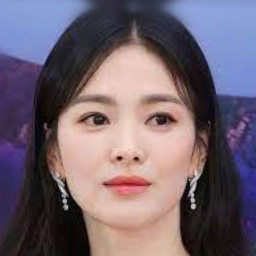

In [20]:
def run_alignment(image_path):
  import dlib
  from utils.alignment import align_face
  predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
  aligned_image = align_face(filepath=image_path, predictor=predictor)
  print("Aligned image has shape: {}".format(aligned_image.size))
  return aligned_image

if experiment_type == "ffhq_encode":
  input_image = run_alignment(image_path)
else:
  input_image = original_image

input_image.resize(resize_dims)

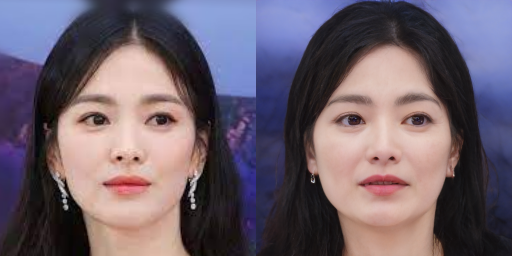

In [21]:
#@title Invert the image
img_transforms = EXPERIMENT_ARGS['transform']
transformed_image = img_transforms(input_image)

def display_alongside_source_image(result_image, source_image):
    res = np.concatenate([np.array(source_image.resize(resize_dims)),
                          np.array(result_image.resize(resize_dims))], axis=1)
    return Image.fromarray(res)

def run_on_batch(inputs, net):
    images, latents = net(inputs.to("cuda").float(), randomize_noise=False, return_latents=True)
    if experiment_type == 'cars_encode':
        images = images[:, :, 32:224, :]
    return images, latents

with torch.no_grad():
    images, latents = run_on_batch(transformed_image.unsqueeze(0), net)
    result_image, latent = images[0], latents[0]
torch.save(latents, 'latents.pt')

# Display inversion:
display_alongside_source_image(tensor2im(result_image), input_image)

## Choose Image Index

In [22]:
img_index =  1#@param {type:"number"}

## Choose Mode

Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


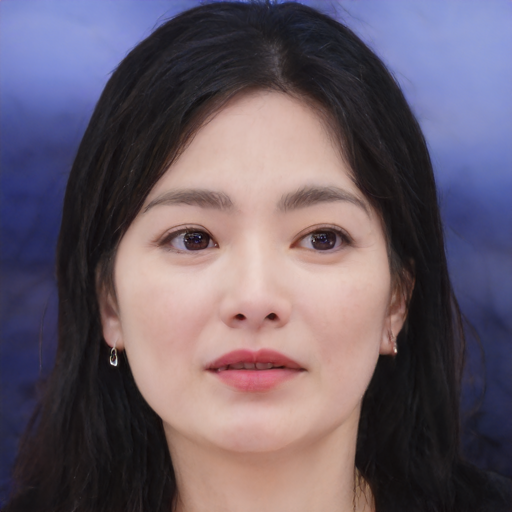

In [24]:
mode='real image' #@param ['real image', 'generated image']

if mode == 'real image':
  img_index = 0
  latents=torch.load('/home/jykim/JY_project/Project/Style/encoder4editing/latents.pt')
  dlatents_loaded=M.G.synthesis.W2S(latents)

  img_indexs=[img_index]
  dlatents_loaded=M.S2List(dlatents_loaded)

  dlatent_tmp=[tmp[img_indexs] for tmp in dlatents_loaded]
elif mode == 'generated image':
  img_indexs=[img_index]
  dlatents_loaded=M.S2List(dlatents_loaded)
  dlatent_tmp=[tmp[img_indexs] for tmp in M.dlatents]
M.num_images=len(img_indexs)

M.alpha=[0]
M.manipulate_layers=[0]
codes,out=M.EditOneC(0,dlatent_tmp)
original=Image.fromarray(out[0,0]).resize((512,512))
M.manipulate_layers=None
original


## Input text description

In [25]:
neutral='face with hair' #@param {type:"string"}
target='face with curl hair' #@param {type:"string"}
classnames=[target,neutral]
dt=GetDt(classnames,model)

0.4778


num of channels being manipulated: 33


(-0.5, 1023.5, 1023.5, -0.5)

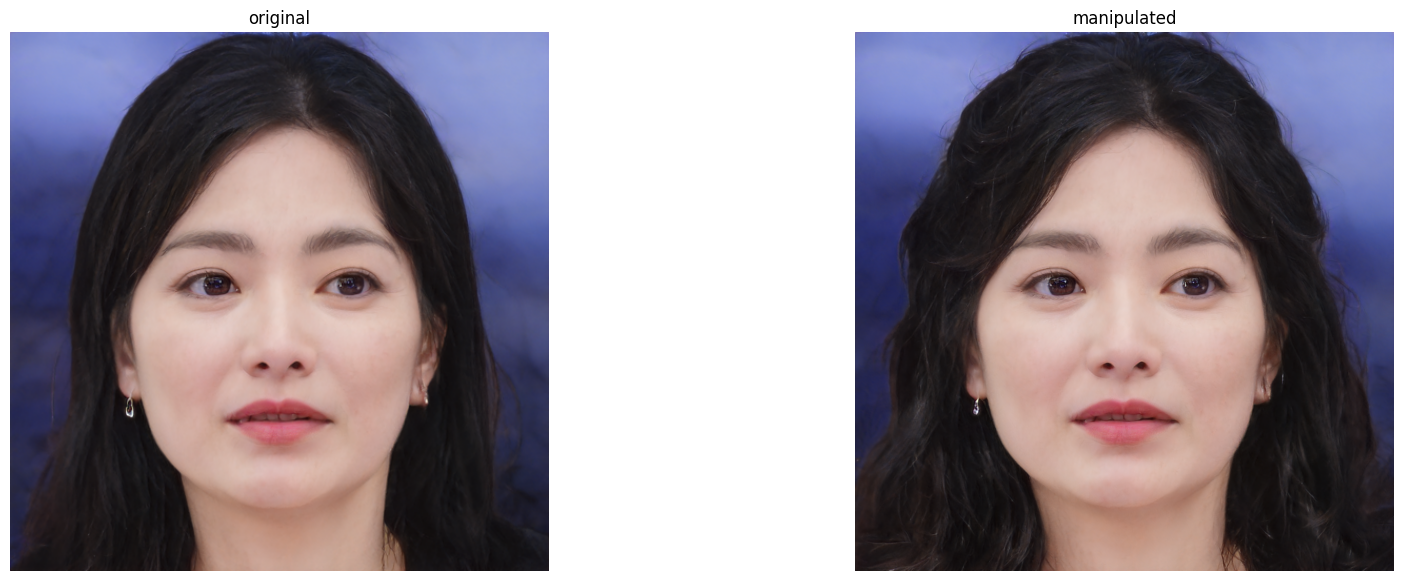

In [26]:
#beta=0.1
#alpha=1
# beta: 최소값일수록 많이 바뀜
beta = 0.23 #@param {type:"slider", min:0.08, max:0.3, step:0.01}
# beta: 최대값일수록 많이 바뀜
alpha = 3 #@param {type:"slider", min:-10, max:10, step:0.1}
M.alpha=[alpha]
boundary_tmp2,c=GetBoundary(fs3,dt,M,threshold=beta)
codes=M.MSCode(dlatent_tmp,boundary_tmp2)
out=M.GenerateImg(codes)
generated=Image.fromarray(out[0,0])#.resize((512,512))


plt.figure(figsize=(20,7), dpi= 100)
plt.subplot(1,2,1)
plt.imshow(original)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(generated)
plt.title('manipulated')
plt.axis('off')

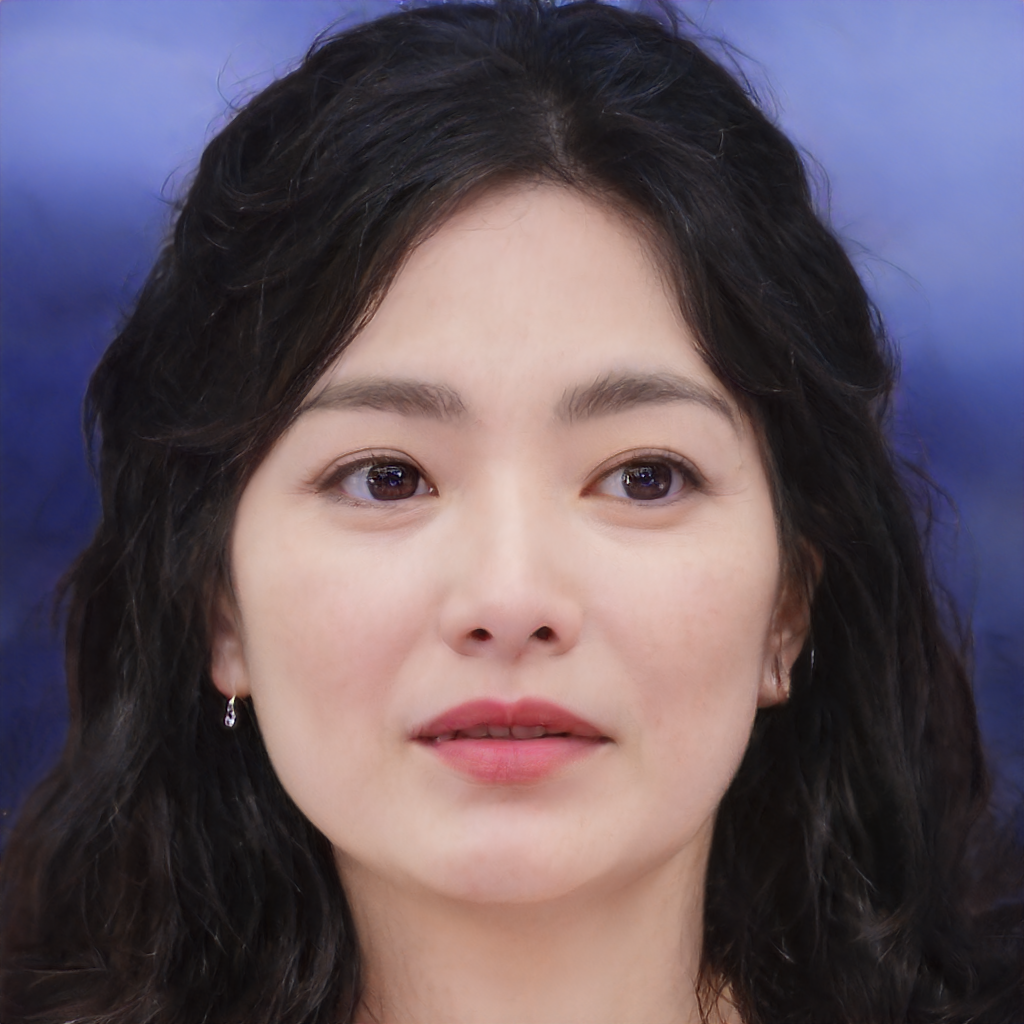

In [27]:
#@title generate a high-res manipulated photo for download
generated